# Naver wordcloud

In [2]:
import pandas as pd
import numpy as np
naver = pd.read_csv('C:/Users/ehdrb/Desktop/공모전 2/naver키워드.csv')

## 전처리

In [3]:
#열자르기
naver=naver[['연관키워드','월간검색수(PC)','월간검색수(모바일)']]
#조건부 행 삭제
naver = naver[naver['월간검색수(PC)'] != '< 10']
naver = naver[naver['월간검색수(모바일)'] != '< 10']
naver = naver[naver['월간검색수(PC)'] != '10']
naver = naver[naver['월간검색수(모바일)'] != '10']
#특수문자 ','삭제
naver['월간검색수(PC)']=naver['월간검색수(PC)'].str.replace(',','').astype(int)
naver['월간검색수(모바일)']=naver['월간검색수(모바일)'].str.replace(',','').astype(int)
#데이터 합치기
naver['월간검색수']=naver['월간검색수(PC)']+naver['월간검색수(모바일)']
#분리
naver=naver[['연관키워드','월간검색수']]
#데이터 정리
naver[naver['연관키워드']=='차량용품']  #23660개
naver[naver['연관키워드']=='자동차용품'] #34520개 더하면 58180
naver.loc[10000] = ['차량제품',58180]

naver[naver['연관키워드']=='방충망청소'] #11260개
naver[naver['연관키워드']=='현관방충망'] #9260개
naver[naver['연관키워드']=='방충망시공'] #8880개
naver[naver['연관키워드']=='롤방충망']   #5390개
naver[naver['연관키워드']=='착한방충망']  #1370개
naver[naver['연관키워드']=='베란다방충망'] #1350개
naver.loc[10001] = ['방충망',11260+9260+8880+5390+1370+1350]

naver=naver.drop(0) #미세먼지 행 삭제

## 리스트 만들어서 단어 넣기

In [4]:
words=[]
for i in naver.index:
    for j in range(0,naver['월간검색수'][i]):
        words.append(naver['연관키워드'][i])
#카운트하기
from collections import Counter        
count = Counter(words)
count.most_common(100)

[('공기청정기', 168700),
 ('미세먼지저감', 71500),
 ('탈모샴푸', 69500),
 ('차량제품', 58180),
 ('방충망', 37510),
 ('초미세먼지', 36340),
 ('차량용공기청정기', 35700),
 ('자동차용품', 34520),
 ('샴푸추천', 34190),
 ('차량용품', 23660),
 ('코막힘뚫는법', 21080),
 ('새집증후군', 19120),
 ('벽지곰팡이제거', 15610),
 ('비듬샴푸', 14800),
 ('포름알데히드', 13880),
 ('곰팡이', 13760),
 ('공기청정기추천', 13750),
 ('에어컨필터', 13560),
 ('VOC', 12970),
 ('식염수', 12690),
 ('자외선차단마스크', 12060),
 ('암모니아', 11380),
 ('방충망청소', 11260),
 ('자동차에어컨필터', 11110),
 ('자동차에어컨필터교체', 10960),
 ('곰팡이제거', 10270),
 ('코세척기', 9840),
 ('담배냄새제거', 9740),
 ('코세척', 9660),
 ('필터', 9560),
 ('현관방충망', 9290),
 ('방충망시공', 8880),
 ('탈모방지샴푸', 8820),
 ('공기청정기순위', 8490),
 ('미세먼지측정기', 8410),
 ('곰팡이냄새제거', 8380),
 ('산소발생기', 8290),
 ('전열교환기', 7930),
 ('노즈스위퍼', 7920),
 ('헤파필터', 7850),
 ('셀프입주청소', 7570),
 ('MESH', 7510),
 ('제습기공기청정기', 7500),
 ('욕실곰팡이제거', 7480),
 ('차량용에어컨필터', 6740),
 ('가정용산소발생기', 6600),
 ('출산준비물리스트', 6350),
 ('황사', 6330),
 ('냄새제거', 5940),
 ('아파트담배냄새', 5620),
 ('새집냄새제거', 5480),
 ('롤방충망', 5390),
 ('원룸공기청정기', 5390

## 워드클라우드 
- pip install pygame 
- pip install -U pytagcloud
- pip install simplejson

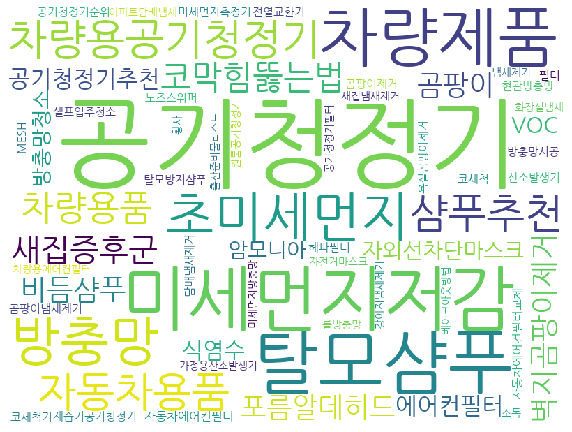

In [5]:
#상위 60위 추출
tag = count.most_common(60)
#pip install wordcloud
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import nltk  
from nltk.corpus import stopwords 

font_path='C:/Users/ehdrb/AppData/Local/Continuum/anaconda3/Lib/site-packages/pytagcloud/fonts/NanumGothic.ttf'

wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tag))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)

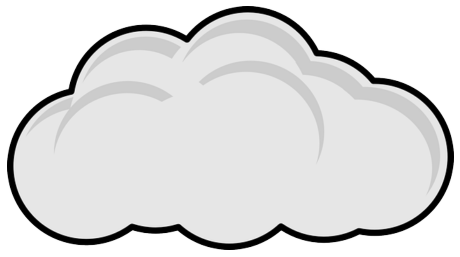

In [6]:
#그림따기
from PIL import Image
from wordcloud import STOPWORDS

cloud_mask = np.array(Image.open('C:/Users/ehdrb/Desktop/공모전 2/cloud.png'))

stopwords=set(STOPWORDS)
stopwords.add('said')

cloud_mask

plt.figure(figsize=(8,8))
plt.imshow(cloud_mask,cmap=plt.cm.gray,interpolation='bilinear')
plt.axis('off')
plt.show()

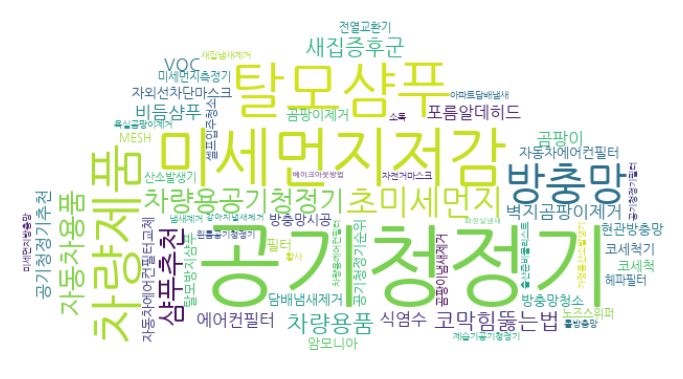

In [7]:
#그림에 tag 삽입시키기
wc = WordCloud(font_path=font_path,background_color='white',max_words=2000,mask=cloud_mask,
               stopwords=stopwords)
wc = wc.generate_from_frequencies(dict(tag))
wc.words_

plt.figure(figsize=(12,12))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()